In [14]:
import os

ttf_dir = "/Users/oyutaeg/Desktop/ttf_changable"
file_list = [x for x in os.listdir(ttf_dir) if x.endswith(".ttf")]

In [15]:
len(file_list)

357

In [16]:
file_list

['WandocleanseaB.ttf',
 '나눔손글씨 성실체.ttf',
 'Cafe24Classictype.ttf',
 'UhBee ddolyoung BOLD.ttf',
 '나눔손글씨 몽돌.ttf',
 'Spoqa Han Sans Regular.ttf',
 '나눔손글씨 다시 시작해.ttf',
 'TMONTium.ttf',
 '나눔손글씨 둥근인연.ttf',
 'UhBee Skyrain BOLD.ttf',
 'UhBee Motomi.ttf',
 'UhBee yoongdi Bold.ttf',
 '나눔손글씨 혁이체.ttf',
 'UhBee Sunhong BOLD.ttf',
 'UhBee W yum Bold.ttf',
 'GothicA1-ExtraLight.ttf',
 'UhBee Hyeki Bold.ttf',
 '나눔손글씨 행복한 도비.ttf',
 'UhBee ibuson.ttf',
 '나눔손글씨 바른히피.ttf',
 'UhBee Yiseul Bold.ttf',
 'UhBee yehee.ttf',
 'UhBee mun seul ye.ttf',
 'UhBee Se_hyun.ttf',
 '경기천년제목_Bold.ttf',
 '나눔손글씨 손편지체.ttf',
 'SeoulHangangEB.ttf',
 'UhBee U JEONG.ttf',
 'UhBee Miwan Bold.ttf',
 'IBMPlexSansKR-Text.ttf',
 'Pretendard-Medium.ttf',
 'UhBee BongSik BOLD.ttf',
 'Chilgok_kyb.ttf',
 '나눔손글씨 희망누리.ttf',
 'SeoulHangangB.ttf',
 'UhBee RingRing Bold.ttf',
 '나눔손글씨 백의의 천사.ttf',

In [17]:
from PIL import ImageFont, ImageDraw, Image

In [18]:
kor_characters = [
    '값',
    '같',
    '곬',
    '곶',
    '깎',
    '넋',
    '늪',
    '닫',
    '닭',
    '닻',
    '됩',
    '뗌',
    '략',
    '몃',
    '밟',
    '볘',
    '뺐',
    '뽈',
    '솩',
    '쐐',
    '앉',
    '않',
    '얘',
    '얾',
    '엌',
    '옳',
    '읊',
    '죡',
    '쮜',
    '춰',
    '츄',
    '퀭',
    '틔',
    '핀',
    '핥',
    '후'
]

In [19]:
len(kor_characters)

36

In [20]:
data_root = "../data_new"
if not os.path.isdir(data_root):
    os.mkdir(data_root)

data_set_name = "explor_all"
data_path = data_root + os.path.sep + data_set_name
if not os.path.isdir(data_path):
    os.mkdir(data_path)

img_path = data_path + os.path.sep + "image"
if not os.path.isdir(img_path):
    os.mkdir(img_path)

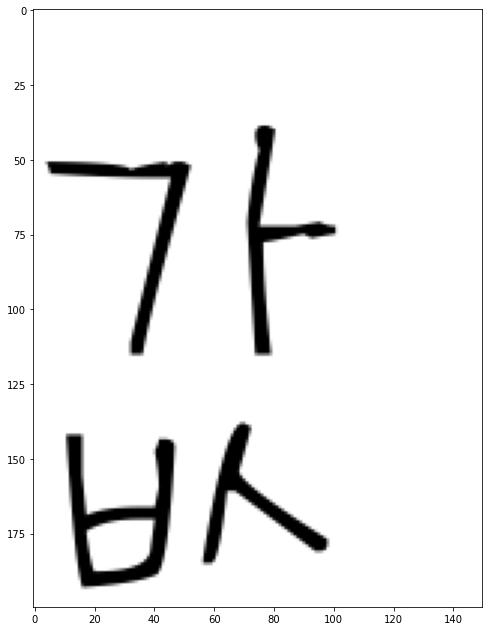

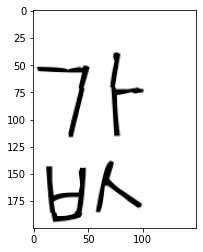

In [21]:
import matplotlib.pyplot as plt

W, H = (150, 200)
# 흰색 배경
image = Image.new('RGB', (W, H), (255, 255, 255))
# 폰트 설정
font_size = 150
font = ImageFont.truetype(ttf_dir + os.path.sep + "UhBee YanNeu.ttf", font_size)
# 이미지 생성
draw = ImageDraw.Draw(image)
# 글자 크기
w, h = draw.textsize("다", font=font)
# 배경 중간에 글자 배치
draw.text((0, 0), "값", fill="black", font=font)
plt.figure(figsize=(11, 11))
plt.imshow(image)
plt.show()
plt.imshow(image.rotate(1, fillcolor="white"))
plt.show()

In [10]:
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

f = open(data_path + os.path.sep + "attributes.txt", "r")
line_num = 1
line = f.readline()
labeled = set()
while line:
    if line_num != 1:
        labeled.add(line.split("/")[0])
    line = f.readline()
    line_num += 1
f.close()

In [11]:
print(len(labeled))

# attributes 파일 생성
f = open(data_path + os.path.sep + "attributes.txt", "a+")
# fot att2font
for file_name in file_list:
    try:
        temp_path = img_path + os.path.sep + Path(file_name).stem.replace(" ", "")
        if not os.path.isdir(temp_path):
            os.mkdir(temp_path)
        # unsuper attributes
        attributes = "  ".join(["1.0" for x in range(10)])
        current_font_name = Path(file_name).stem.replace(" ", "")
        if current_font_name in labeled:
            # 이전에 라벨링 했으니 이미지 파일만 만듦 / aug는 1로 고정
            # 파일명 이어써져서 대충 3번 나누기
            for i, character in tqdm(enumerate(kor_characters)):
                # 배경 이미지 크기
                idx = '{0:02d}'.format(i + 10)
                W, H = (256, 256)
                # 흰색 배경
                image = Image.new('RGB', (W, H), (255, 255, 255))
                # 폰트 설정
                font_size = 130
                font = ImageFont.truetype(ttf_dir + os.path.sep + file_name, font_size)
                # 이미지 생성
                draw = ImageDraw.Draw(image)
                # 글자 크기
                w, h = draw.textsize(character, font=font)

                # 배경 중간에 글자 배치
                draw.text(((W - w ) / 2, (H - h) / 2), character, fill="black", font=font)
                image.save(img_path + os.path.sep + Path(file_name).stem.replace(" ", "") + os.path.sep + idx +".png")        

            for i, character in tqdm(enumerate(kor_characters)):
                # 배경 이미지 크기
                idx = '{0:02d}'.format(i + 10)
                W, H = (256, 256)
                # 흰색 배경
                image = Image.new('RGB', (W, H), (255, 255, 255))
                # 폰트 설정
                font_size = 130
                font = ImageFont.truetype(ttf_dir + os.path.sep + file_name, font_size)
                # 이미지 생성
                draw = ImageDraw.Draw(image)
                # 글자 크기
                w, h = draw.textsize(character, font=font)

                # 배경 중간에 글자 배치
                draw.text(((W - w ) / 2, (H - h) / 2), character, fill="black", font=font)
                 # augmented (rotation)
                aug_path = temp_path + "_rotated"
                if not os.path.isdir(aug_path):
                    os.mkdir(aug_path)
                image.rotate(1, fillcolor="white").save(img_path + os.path.sep + Path(file_name).stem.replace(" ", "") + "_rotated"+ os.path.sep + idx +".png")
                f.write(Path(aug_path).stem.replace(" ", "") + "/" + idx +".png" + "  " + attributes + "\n")        

            for i, character in tqdm(enumerate(kor_characters)):
                # 배경 이미지 크기
                idx = '{0:02d}'.format(i + 10)
                W, H = (256, 256)
                # 흰색 배경
                image = Image.new('RGB', (W, H), (255, 255, 255))
                # 폰트 설정
                font_size = 130
                font = ImageFont.truetype(ttf_dir + os.path.sep + file_name, font_size)
                # 이미지 생성
                draw = ImageDraw.Draw(image)
                # 글자 크기
                w, h = draw.textsize(character, font=font)

                # 배경 중간에 글자 배치
                draw.text(((W - w ) / 2, (H - h) / 2), character, fill="black", font=font)
                # augmented (rotation -1)
                aug_path = temp_path + "_rotated_m1"
                if not os.path.isdir(aug_path):
                    os.mkdir(aug_path)
                image.rotate(-1, fillcolor="white").save(img_path + os.path.sep + Path(file_name).stem.replace(" ", "") + "_rotated_m1"+ os.path.sep + idx +".png")
                f.write(Path(aug_path).stem.replace(" ", "") + "/" + idx +".png" + "  " + attributes + "\n")        
        else:
            # 1로 픽스하고 이미지 파일 만듦 / aug도 같이 만듦
            for i, character in enumerate(kor_characters):
                # 배경 이미지 크기
                idx = '{0:02d}'.format(i + 10)
                W, H = (256, 256)
                # 흰색 배경
                image = Image.new('RGB', (W, H), (255, 255, 255))
                # 폰트 설정
                font_size = 130
                font = ImageFont.truetype(ttf_dir + os.path.sep + file_name, font_size)
                # 이미지 생성
                draw = ImageDraw.Draw(image)
                # 글자 크기
                w, h = draw.textsize(character, font=font)

                # 배경 중간에 글자 배치
                draw.text(((W - w ) / 2, (H - h) / 2), character, fill="black", font=font)

                # orifinal
                image.save(img_path + os.path.sep + Path(file_name).stem.replace(" ", "") + os.path.sep + idx +".png")
                f.write(Path(file_name).stem.replace(" ", "") + "/" + idx +".png" + "  " + attributes + "\n")        

            for i, character in tqdm(enumerate(kor_characters)):
                # 배경 이미지 크기
                idx = '{0:02d}'.format(i + 10)
                W, H = (256, 256)
                # 흰색 배경
                image = Image.new('RGB', (W, H), (255, 255, 255))
                # 폰트 설정
                font_size = 130
                font = ImageFont.truetype(ttf_dir + os.path.sep + file_name, font_size)
                # 이미지 생성
                draw = ImageDraw.Draw(image)
                # 글자 크기
                w, h = draw.textsize(character, font=font)

                # 배경 중간에 글자 배치
                draw.text(((W - w ) / 2, (H - h) / 2), character, fill="black", font=font)

                # augmented (rotation 1)
                aug_path = temp_path + "_rotated"
                if not os.path.isdir(aug_path):
                    os.mkdir(aug_path)
                image.rotate(1, fillcolor="white").save(img_path + os.path.sep + Path(file_name).stem.replace(" ", "") + "_rotated"+ os.path.sep + idx +".png")
                f.write(Path(aug_path).stem.replace(" ", "") + "/" + idx +".png" + "  " + attributes + "\n")        

            for i, character in tqdm(enumerate(kor_characters)):
                # 배경 이미지 크기
                idx = '{0:02d}'.format(i + 10)
                W, H = (256, 256)
                # 흰색 배경
                image = Image.new('RGB', (W, H), (255, 255, 255))
                # 폰트 설정
                font_size = 130
                font = ImageFont.truetype(ttf_dir + os.path.sep + file_name, font_size)
                # 이미지 생성
                draw = ImageDraw.Draw(image)
                # 글자 크기
                w, h = draw.textsize(character, font=font)

                # 배경 중간에 글자 배치
                draw.text(((W - w ) / 2, (H - h) / 2), character, fill="black", font=font)
                # augmented (rotation -1)
                aug_path = temp_path + "_rotated_m1"
                if not os.path.isdir(aug_path):
                    os.mkdir(aug_path)
                image.rotate(-1, fillcolor="white").save(img_path + os.path.sep + Path(file_name).stem.replace(" ", "") + "_rotated_m1"+ os.path.sep + idx +".png")
                f.write(Path(aug_path).stem.replace(" ", "") + "/" + idx +".png" + "  " + attributes + "\n")        
    except:
        print(file_name)
            
            

# 나머지는 augmentation으로 채우기


f.close()

# for dmfont

# todo



0


36it [00:00, 216.20it/s]
36it [00:00, 226.05it/s]
36it [00:00, 257.26it/s]
36it [00:00, 258.47it/s]
36it [00:00, 244.91it/s]
36it [00:00, 248.42it/s]
36it [00:00, 266.37it/s]
36it [00:00, 255.97it/s]
36it [00:00, 209.27it/s]
36it [00:00, 247.50it/s]
36it [00:00, 229.56it/s]
36it [00:00, 237.61it/s]
36it [00:00, 253.26it/s]
36it [00:00, 254.81it/s]
36it [00:00, 221.71it/s]
36it [00:00, 278.00it/s]
36it [00:00, 252.68it/s]
36it [00:00, 262.63it/s]
36it [00:00, 216.67it/s]
36it [00:00, 217.02it/s]
36it [00:00, 233.56it/s]
36it [00:00, 227.15it/s]
36it [00:00, 218.51it/s]
36it [00:00, 210.57it/s]
36it [00:00, 232.64it/s]
36it [00:00, 231.53it/s]
36it [00:00, 245.81it/s]
36it [00:00, 264.17it/s]
36it [00:00, 266.32it/s]
36it [00:00, 274.74it/s]
36it [00:00, 242.87it/s]
36it [00:00, 234.42it/s]
36it [00:00, 224.30it/s]
36it [00:00, 225.96it/s]
36it [00:00, 249.73it/s]
36it [00:00, 256.22it/s]
36it [00:00, 237.31it/s]
36it [00:00, 237.61it/s]
36it [00:00, 236.70it/s]
36it [00:00, 231.00it/s]


나눔손글씨 동화또박.ttf


36it [00:00, 229.98it/s]
36it [00:00, 237.14it/s]
36it [00:00, 249.92it/s]
36it [00:00, 251.61it/s]
36it [00:00, 236.60it/s]
36it [00:00, 240.64it/s]
36it [00:00, 222.45it/s]
36it [00:00, 228.04it/s]
36it [00:00, 266.21it/s]
36it [00:00, 257.57it/s]
36it [00:00, 268.23it/s]
36it [00:00, 265.92it/s]
36it [00:00, 253.20it/s]
36it [00:00, 242.67it/s]
36it [00:00, 232.63it/s]
36it [00:00, 231.87it/s]
36it [00:00, 251.16it/s]
36it [00:00, 253.00it/s]
36it [00:00, 244.22it/s]
36it [00:00, 239.81it/s]
36it [00:00, 263.60it/s]
36it [00:00, 267.14it/s]
36it [00:00, 156.44it/s]
36it [00:00, 185.13it/s]
36it [00:00, 244.96it/s]
36it [00:00, 246.50it/s]
36it [00:00, 257.33it/s]
36it [00:00, 256.14it/s]
36it [00:00, 244.73it/s]
36it [00:00, 249.30it/s]
36it [00:00, 238.32it/s]
36it [00:00, 243.25it/s]
36it [00:00, 334.94it/s]
36it [00:00, 332.09it/s]
36it [00:00, 217.29it/s]
36it [00:00, 199.68it/s]
36it [00:00, 227.15it/s]
36it [00:00, 248.17it/s]
36it [00:00, 246.25it/s]
36it [00:00, 246.00it/s]


In [12]:
from tqdm import tqdm
from pathlib import Path

f = open(data_path + os.path.sep + "attributes.txt", "r")
line_num = 1
line = f.readline()
labeled = list()
while line:
    if line_num != 1:
        labeled.append(line.split("/")[0])
    line = f.readline()
    line_num += 1
f.close()

test = set(labeled)
print(len(test))
print(len(labeled) /36)


    


1068
1068.0


In [13]:
from collections import Counter
result = Counter(labeled)
print(result)

Counter({'WandocleanseaB': 36, 'WandocleanseaB_rotated': 36, 'WandocleanseaB_rotated_m1': 36, '나눔손글씨성실체': 36, '나눔손글씨성실체_rotated': 36, '나눔손글씨성실체_rotated_m1': 36, 'Cafe24Classictype': 36, 'Cafe24Classictype_rotated': 36, 'Cafe24Classictype_rotated_m1': 36, 'UhBeeddolyoungBOLD': 36, 'UhBeeddolyoungBOLD_rotated': 36, 'UhBeeddolyoungBOLD_rotated_m1': 36, '나눔손글씨몽돌': 36, '나눔손글씨몽돌_rotated': 36, '나눔손글씨몽돌_rotated_m1': 36, 'SpoqaHanSansRegular': 36, 'SpoqaHanSansRegular_rotated': 36, 'SpoqaHanSansRegular_rotated_m1': 36, '나눔손글씨다시시작해': 36, '나눔손글씨다시시작해_rotated': 36, '나눔손글씨다시시작해_rotated_m1': 36, 'TMONTium': 36, 'TMONTium_rotated': 36, 'TMONTium_rotated_m1': 36, '나눔손글씨둥근인연': 36, '나눔손글씨둥근인연_rotated': 36, '나눔손글씨둥근인연_rotated_m1': 36, 'UhBeeSkyrainBOLD': 36, 'UhBeeSkyrainBOLD_rotated': 36, 'UhBeeSkyrainBOLD_rotated_m1': 36, 'UhBeeMotomi': 36,